# Aerospace and Defense Portfolio Risk and Returns

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Aerospace and Defense  
symbols = ['LMT','NOC','RTN']
start = '2019-01-01'
end = '2020-04-24'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
1 years


In [5]:
number_of_years = delta.years

In [6]:
days = (df.index[-1] - df.index[0]).days
days

477

In [7]:
df.head()

,LMT,NOC,RTN
Date,,,
2019-01-02,256.459991,241.629272,151.138794
2019-01-03,250.017685,235.303391,146.873474
2019-01-04,256.760315,243.129852,150.746597
2019-01-07,259.705292,245.022720,152.335037
2019-01-08,261.439392,246.130981,154.149033


In [8]:
df.tail()

,LMT,NOC,RTN
Date,,,
2020-04-17,401.510010,356.299988,NaN
2020-04-20,383.209991,343.910004,NaN
2020-04-21,373.440002,333.679993,NaN
2020-04-22,380.399994,342.010010,NaN
2020-04-23,376.730011,335.829987,NaN


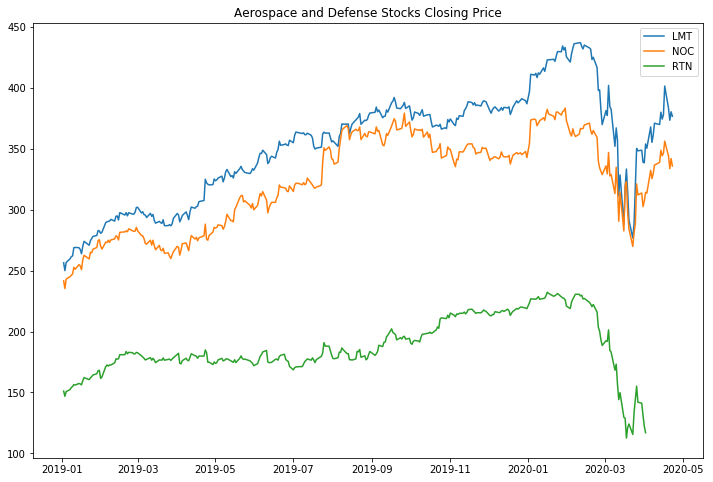

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title('Aerospace and Defense Stocks Closing Price')
plt.legend(labels=df.columns)

In [10]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

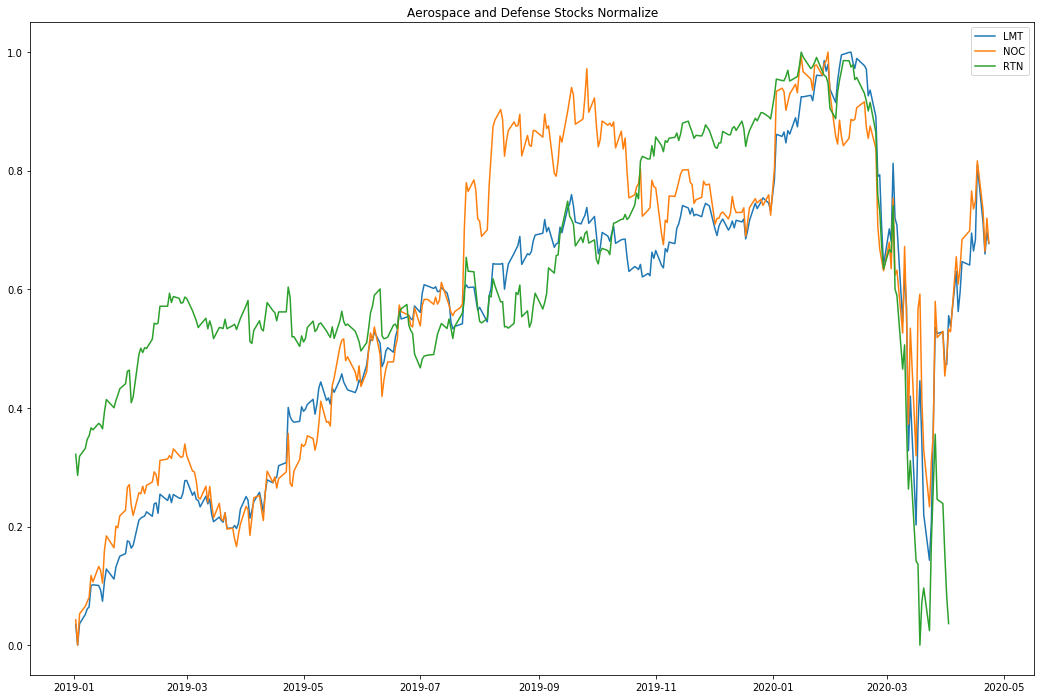

In [11]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title('Aerospace and Defense Stocks Normalize')
plt.legend(labels=normalize.columns)

In [12]:
stock_rets = df.pct_change().dropna()

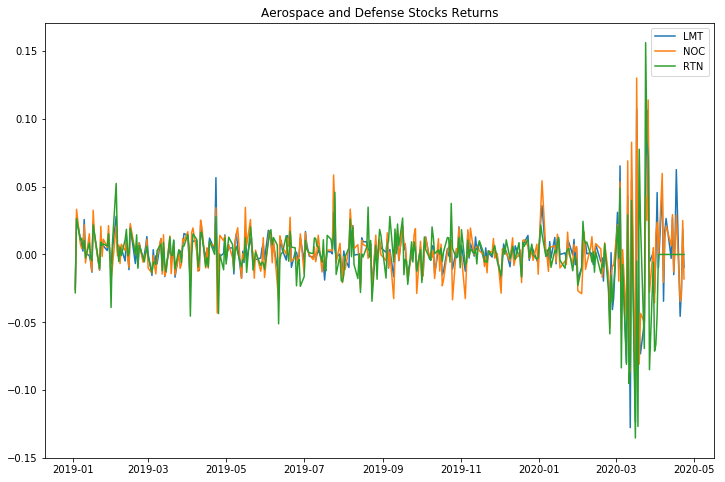

In [13]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title('Aerospace and Defense Stocks Returns')
plt.legend(labels=stock_rets.columns)

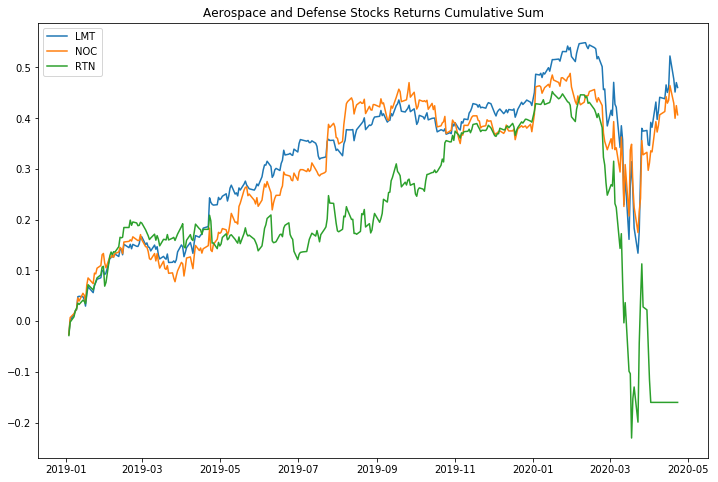

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title('Aerospace and Defense Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

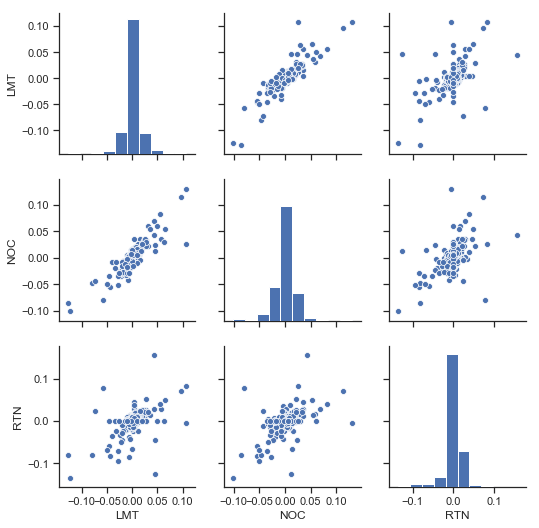

In [15]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

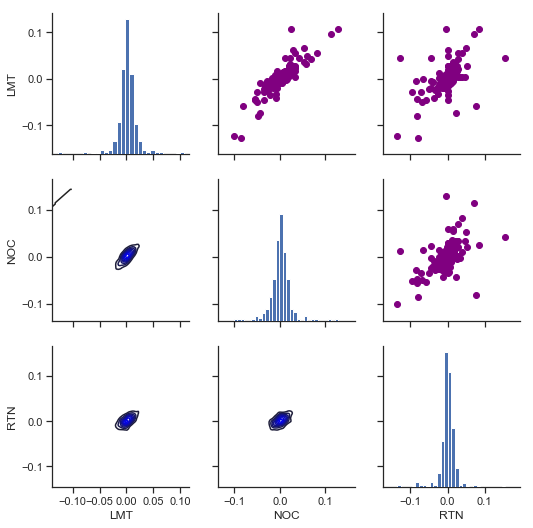

In [16]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

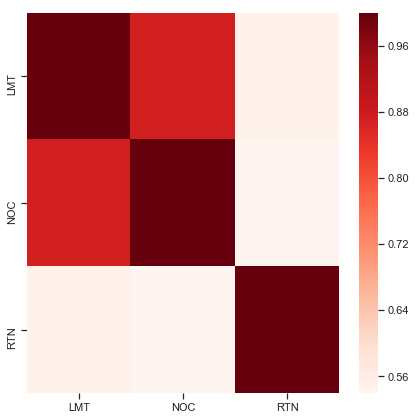

In [17]:
plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

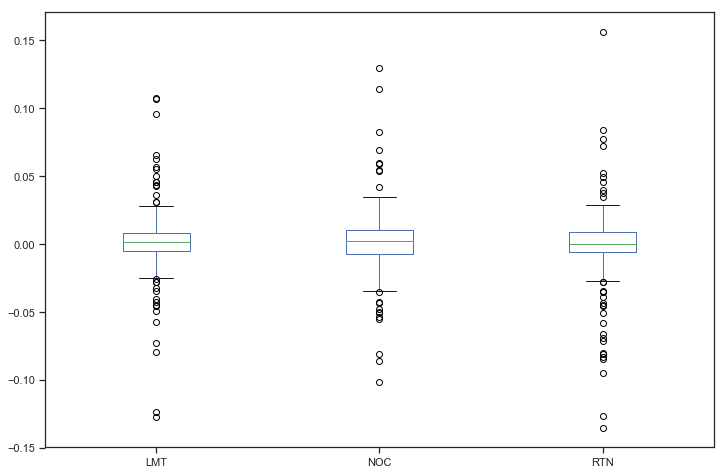

In [18]:
# Box plot
stock_rets.plot(kind='box',figsize=(12,8))

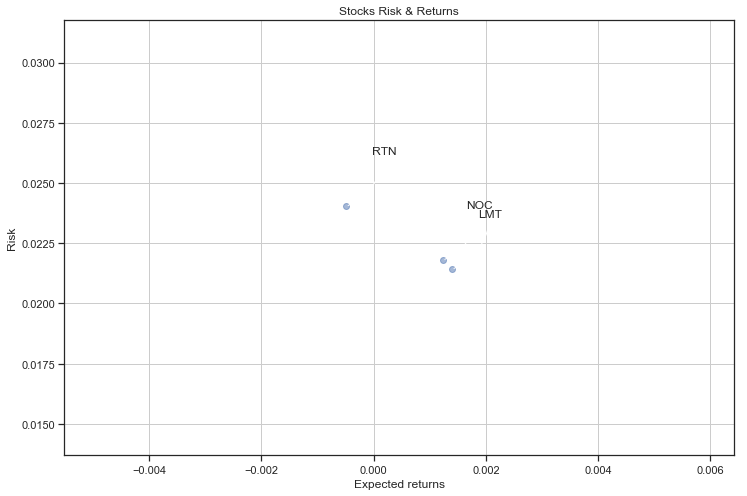

In [19]:
rets = stock_rets.dropna()

plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

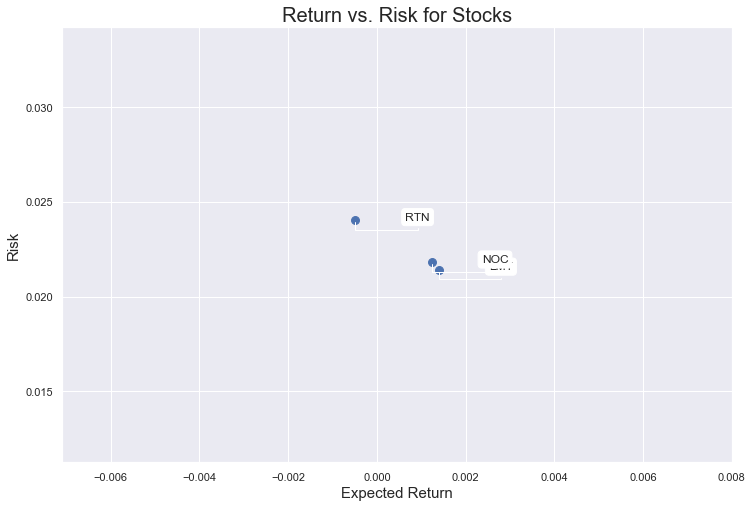

In [20]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [21]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

RTN  RTN    1.000000
NOC  NOC    1.000000
LMT  LMT    1.000000
NOC  LMT    0.874089
LMT  NOC    0.874089
RTN  LMT    0.549722
LMT  RTN    0.549722
RTN  NOC    0.539163
NOC  RTN    0.539163
dtype: float64

In [22]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,LMT,NOC,RTN
Date,,,
2019-01-03,0.436347,0.325231,0.367458
2019-01-04,0.658100,0.582025,0.554853
2019-01-07,0.592118,0.471966,0.500503
2019-01-08,0.571715,0.457873,0.505208
2019-01-09,0.553858,0.458817,0.480053


In [23]:
Normalized_Value.corr()

,LMT,NOC,RTN
LMT,1.000000,0.874089,0.549722
NOC,0.874089,1.000000,0.539163
RTN,0.549722,0.539163,1.000000


In [24]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

RTN  RTN    1.000000
NOC  NOC    1.000000
LMT  LMT    1.000000
NOC  LMT    0.874089
LMT  NOC    0.874089
RTN  LMT    0.549722
LMT  RTN    0.549722
RTN  NOC    0.539163
NOC  RTN    0.539163
dtype: float64

In [25]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
LMT    0.001400
NOC    0.001236
RTN   -0.000486
dtype: float64
--------------------------------------------------
Stock risks:
LMT    0.021418
NOC    0.021795
RTN    0.024030
dtype: float64


In [26]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
RTN,-0.000486,0.024030
NOC,0.001236,0.021795
LMT,0.001400,0.021418


In [27]:
table.sort_values(by='Risk')

,Returns,Risk
LMT,0.001400,0.021418
NOC,0.001236,0.021795
RTN,-0.000486,0.024030


In [28]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
LMT,0.001400,0.021418,-0.401526
NOC,0.001236,0.021795,-0.402099
RTN,-0.000486,0.024030,-0.436384


In [29]:
table['Max Returns'] = rets.max()

In [30]:
table['Min Returns'] = rets.min()

In [31]:
table['Median Returns'] = rets.median()

In [32]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
LMT,0.001400,0.021418,-0.401526,0.107279,-0.127616,0.001419,-0.964769
NOC,0.001236,0.021795,-0.402099,0.130012,-0.101463,0.001847,-1.806971
RTN,-0.000486,0.024030,-0.436384,0.156050,-0.135269,0.000336,0.000000


In [33]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days
LMT,0.001400,0.021418,-0.401526,0.107279,-0.127616,0.001419,-0.964769,-0.000020
NOC,0.001236,0.021795,-0.402099,0.130012,-0.101463,0.001847,-1.806971,-0.000038
RTN,-0.000486,0.024030,-0.436384,0.156050,-0.135269,0.000336,0.000000,0.000000


In [34]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
LMT,0.001400,0.021418,-0.401526,0.107279,-0.127616,0.001419,-0.964769,-0.000020,0.225271
NOC,0.001236,0.021795,-0.402099,0.130012,-0.101463,0.001847,-1.806971,-0.000038,0.189957
RTN,-0.000486,0.024030,-0.436384,0.156050,-0.135269,0.000336,0.000000,0.000000,NaN


In [35]:
table.sort_values(by='Average Return Days')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
NOC,0.001236,0.021795,-0.402099,0.130012,-0.101463,0.001847,-1.806971,-0.000038,0.189957
LMT,0.001400,0.021418,-0.401526,0.107279,-0.127616,0.001419,-0.964769,-0.000020,0.225271
RTN,-0.000486,0.024030,-0.436384,0.156050,-0.135269,0.000336,0.000000,0.000000,NaN
